## Stage09: Feature Engineering

In [ ]:
import pandas as pd
import numpy as np

# Load cleaned Apple stock data
df = pd.read_csv('/Users/yuqingyan/Desktop/bootcamp_Yuqing_Yan/project/data/processed/aapl_2023_cleaned.csv')
df.set_index('date', inplace=True)
df.head()

,Close,High,Low,Open,Volume
date,,,,,
2023-01-03,0.000674,0.042897,0.000000,0.058400,0.675849
2023-01-04,0.018060,0.012197,0.012309,0.012036,0.499315
2023-01-05,0.000000,0.000000,0.007980,0.015318,0.436765
2023-01-06,0.061997,0.034536,0.009739,0.000000,0.488887
2023-01-09,0.069139,0.077296,0.077369,0.060998,0.358705


### Feature 1: price_range
- Rationale: The daily price range (High - Low) captures the volatility of each trading day. 

Higher ranges may indicate more uncertainty or market activity, which can be predictive of future price movement or risk.

In [29]:
# Feature 1: Daily price range (High - Low)
df['price_range'] = df['High'] - df['Low']
df.head()

,Close,High,Low,Open,Volume,price_range
date,,,,,,
2023-01-03,0.000674,0.042897,0.000000,0.058400,0.675849,0.042897
2023-01-04,0.018060,0.012197,0.012309,0.012036,0.499315,-0.000111
2023-01-05,0.000000,0.000000,0.007980,0.015318,0.436765,-0.007980
2023-01-06,0.061997,0.034536,0.009739,0.000000,0.488887,0.024798
2023-01-09,0.069139,0.077296,0.077369,0.060998,0.358705,-0.000073


### Feature 2: close_ma_5
- Rationale: The 5-day moving average of the closing price smooths out short-term fluctuations and highlights trends. 

This feature is used to identify momentum and support/resistance levels.

In [30]:
# Feature 2: 5-day moving average of Close price
df['close_ma_5'] = df['Close'].shift(1).rolling(window=5, min_periods=5).mean()
df.head(7)

,Close,High,Low,Open,Volume,price_range,close_ma_5
date,,,,,,,
2023-01-03,0.000674,0.042897,0.000000,0.058400,0.675849,0.042897,NaN
2023-01-04,0.018060,0.012197,0.012309,0.012036,0.499315,-0.000111,NaN
2023-01-05,0.000000,0.000000,0.007980,0.015318,0.436765,-0.007980,NaN
2023-01-06,0.061997,0.034536,0.009739,0.000000,0.488887,0.024798,NaN
2023-01-09,0.069139,0.077296,0.077369,0.060998,0.358705,-0.000073,NaN
2023-01-10,0.076957,0.047830,0.053428,0.058126,0.305795,-0.005597,0.029974
2023-01-11,0.114155,0.078667,0.085079,0.071666,0.348484,-0.006412,0.045231


### Plot / test correlation with target variable

In [31]:
# Target variable: next day's close price
df['close_next'] = df['Close'].shift(-1)

df = df.dropna(subset=['close_next', 'close_ma_5'])
df.head()

,Close,High,Low,Open,Volume,price_range,close_ma_5,close_next
date,,,,,,,,
2023-01-10,0.076957,0.047830,0.053428,0.058126,0.305795,-0.005597,0.029974,0.114155
2023-01-11,0.114155,0.078667,0.085079,0.071666,0.348484,-0.006412,0.045231,0.113077
2023-01-12,0.113077,0.088946,0.098335,0.107636,0.363224,-0.009389,0.064450,0.131272
2023-01-13,0.131272,0.097991,0.101311,0.082334,0.259087,-0.003319,0.087065,0.147175
2023-01-17,0.147175,0.130472,0.134720,0.120629,0.303880,-0.004248,0.100920,0.137336


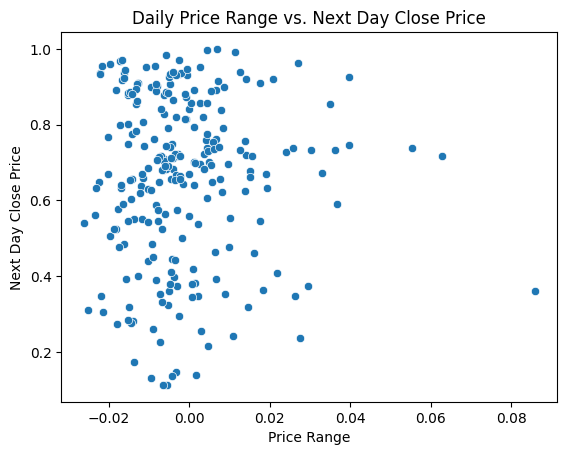

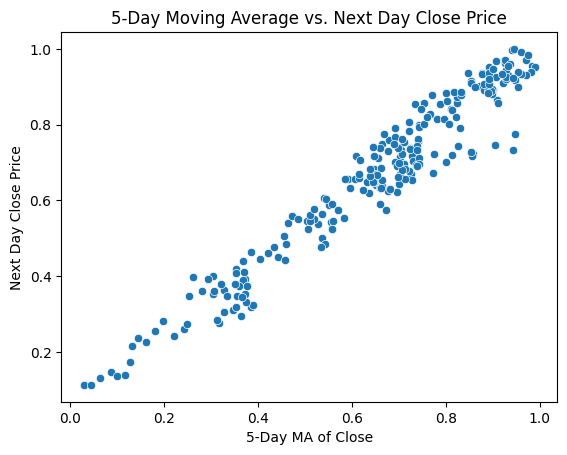

Correlation with next day Close:
             price_range  close_ma_5  close_next
price_range     1.000000    0.027344   -0.002229
close_ma_5      0.027344    1.000000    0.971399
close_next     -0.002229    0.971399    1.000000


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot price_range vs. next day's Close
sns.scatterplot(x='price_range', y='close_next', data=df)
plt.title('Daily Price Range vs. Next Day Close Price')
plt.xlabel('Price Range')
plt.ylabel('Next Day Close Price')
plt.show()

# Plot close_ma_5 vs. next day's Close
sns.scatterplot(x='close_ma_5', y='close_next', data=df)
plt.title('5-Day Moving Average vs. Next Day Close Price')
plt.xlabel('5-Day MA of Close')
plt.ylabel('Next Day Close Price')
plt.show()

# Correlation with next day's Close
print("Correlation with next day Close:")
print(df[['price_range', 'close_ma_5', 'close_next']].corr())